In [3]:
## importar bibliotecas

In [4]:
import csv #permite ler e escrever arquivos em formato csv
import matplotlib.pyplot as plt #permite criar graficos

In [5]:
## Declara o local dos arquivos 

In [6]:
casos_por_estado = 'D:\\01_databases\\CovidDataAnalytics\\casos\\Novos_Casos_Por_Estado.csv'

In [7]:
with  open(casos_por_estado, 'r') as casos_csv:

    arquivo = csv.reader(casos_csv)


    casos = []
    for linha in arquivo:
        casos.append(linha)
        
    
print(casos[0])

['city_ibge_code', 'date', 'epidemiological_week', 'state', 'new_confirmed']


In [8]:
## Coleta estados

In [9]:
states = []


for linha in casos:

    #pula primeira linha
    if linha == casos[0]:
        pass

    #adiciona todos os estados numa lista
    elif linha[3] not in states:
        states.append(linha[3])

print(states)

    

['SP', 'ES', 'RJ', 'BA', 'DF', 'AL', 'MG', 'RS', 'GO', 'PB', 'PE', 'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'TO', 'PI', 'AP', 'MA', 'MT', 'RO', 'RR']


In [10]:
##  Cria CSV com fator  de crescimento

In [11]:
for state in states:
    novos_casos = []

    with open("csvs\\" + (state) + '_fator_de_crescimento.csv', 'w', newline='') as newfile:
        writer = csv.writer(newfile, delimiter=',')
        writer.writerow([casos[0][2]] + ['fator_de_crescimento'])

        for linha in casos:
            if linha[3] == state:
                novos_casos.append(linha[4])

        for i, caso in enumerate(novos_casos):
            
            if i != 0 and novos_casos[i-1] != '0':
                fator_de_crescimento = (float(caso) + float(novos_casos[i-1]))/float(novos_casos[i-1])
                writer.writerow([i + 9] + [round(fator_de_crescimento, 2)])
                


            
            

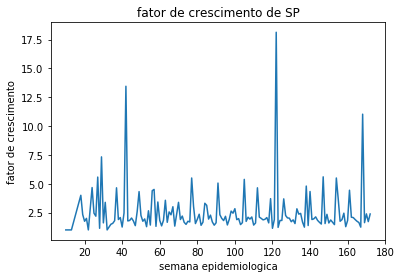

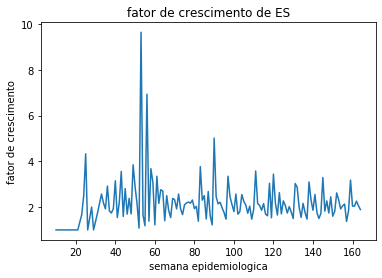

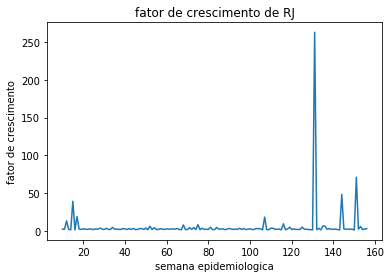

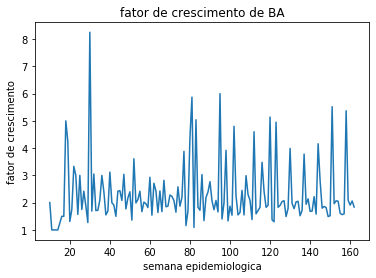

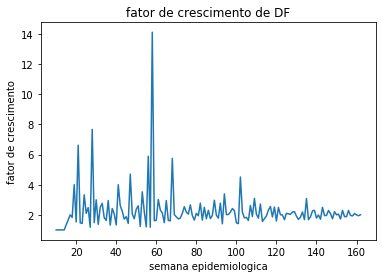

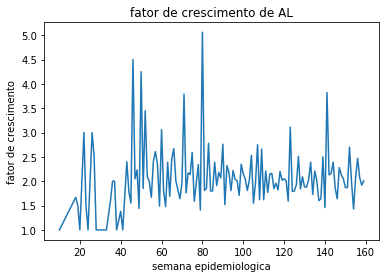

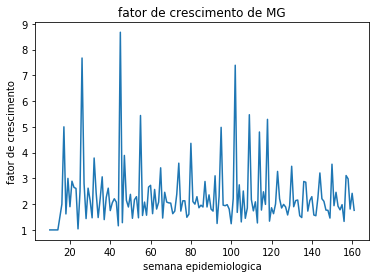

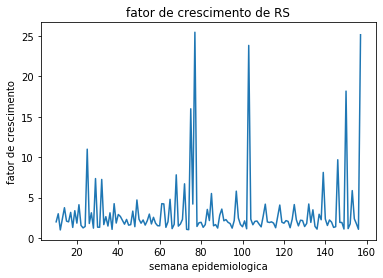

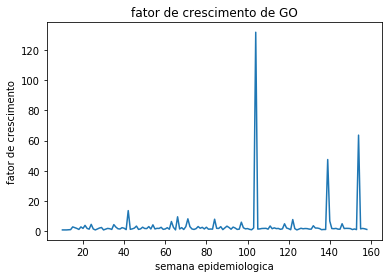

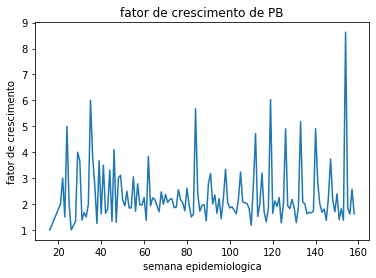

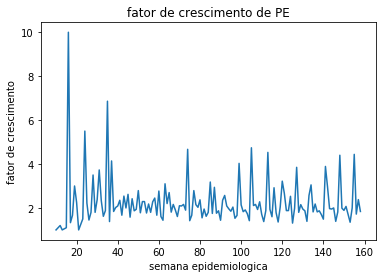

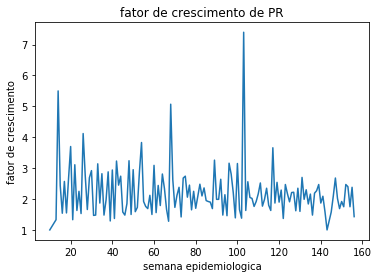

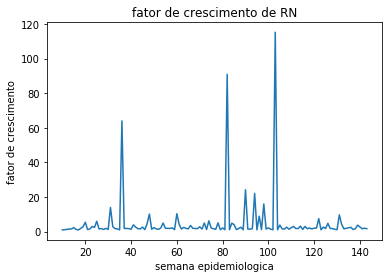

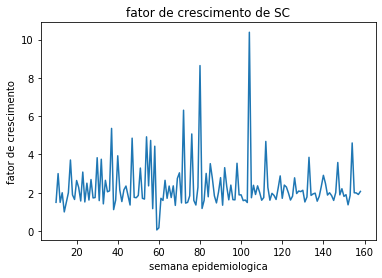

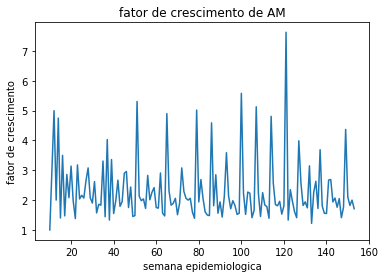

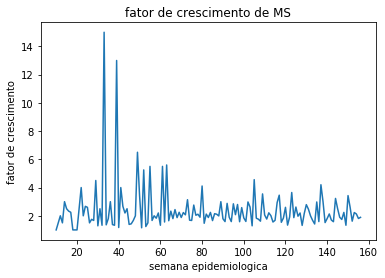

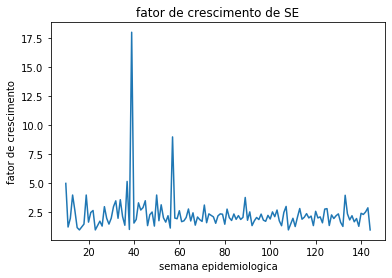

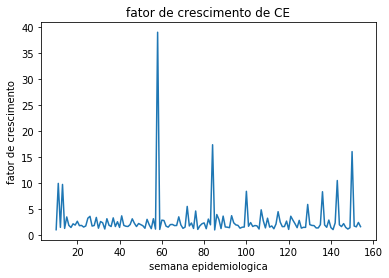

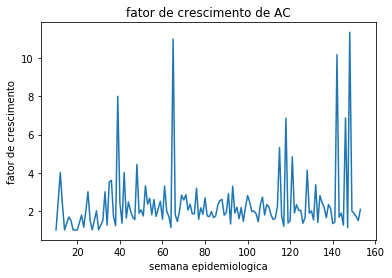

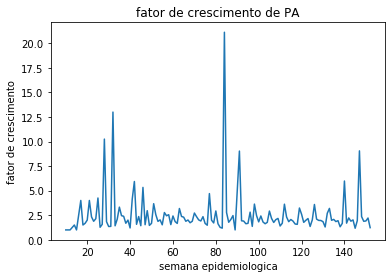

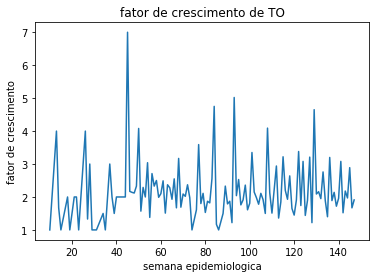

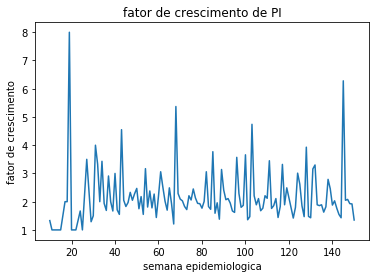

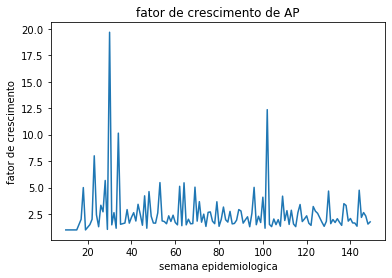

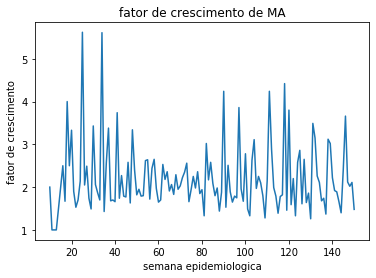

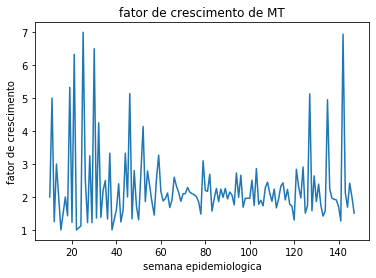

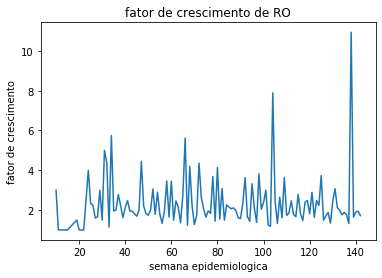

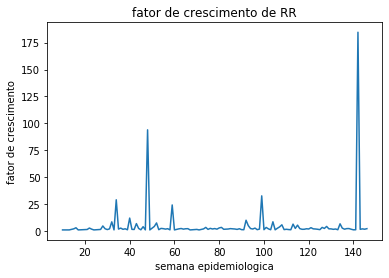

In [43]:
for state in states: 
     with open("csvs\\" + (state) + '_fator_de_crescimento.csv', 'r') as csvfile:
        
        arquivo = csv.reader(csvfile)



        fator_de_crescimento = []
        semana_epidemiologica = []

        for i, linha in enumerate(arquivo):
            if i != 0:
                semana_epidemiologica.append(float(linha[0]))
                fator_de_crescimento.append(float(linha[1]))

        plt.plot(semana_epidemiologica, fator_de_crescimento)
        plt.title('fator de crescimento de ' + (state))
        plt.xlabel('semana epidemiologica')
        plt.ylabel('fator de crescimento')
        plt.savefig('graficos\\fator_de_crescimento_' + (state) + '.png')
        plt.show()

